In [262]:
import pandas as pd

LABELED_PATH = "../data/processed/wintermute_transfers_clean_defi.parquet"  # adjust if you used .csv
df_defi = pd.read_parquet(LABELED_PATH)
display(df_defi.shape)
display(df_defi.info())

(366250, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366250 entries, 0 to 366249
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     366250 non-null  object 
 1   from_address  366250 non-null  object 
 2   from_entity   366250 non-null  object 
 3   to_address    366250 non-null  object 
 4   to_entity     366250 non-null  object 
 5   token         366250 non-null  object 
 6   value         366250 non-null  float64
 7   usd           366250 non-null  float64
 8   tx_hash       366250 non-null  object 
 9   chain         366250 non-null  object 
 10  block_number  366250 non-null  float64
dtypes: float64(3), object(8)
memory usage: 30.7+ MB


None

# Frquency Top 10

,token,tx_count
0,USDC,108890
1,WSOL,96220
2,SOL,47722
3,WETH,40411
4,USDT,17090
5,WBTC,12565
6,cbBTC,8858
7,ARB,5181
8,WBNB,2765
9,JUP,2442


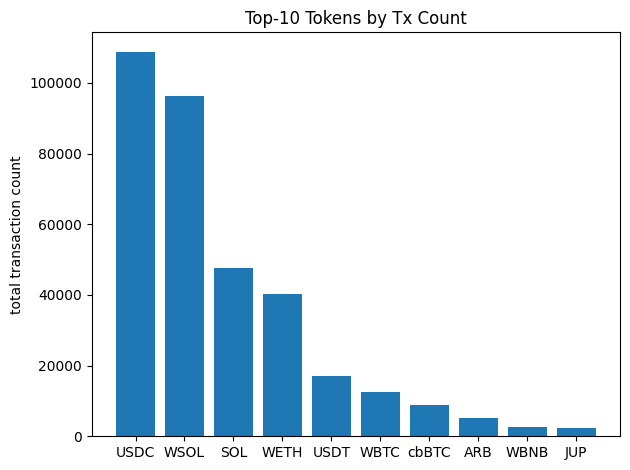

In [263]:
import matplotlib.pyplot as plt

top_freq = (
    df_defi["token"]
    .value_counts()
    .head(10)
    .rename_axis("token")
    .reset_index(name="tx_count")
)
display(top_freq)

plt.bar(top_freq['token'],top_freq['tx_count'])
plt.ylabel("total transaction count")
plt.title("Top-10 Tokens by Tx Count")
plt.tight_layout()

# Volume top-10

In [264]:
top_vol = (
    df_defi.groupby("token")['value'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume")
)
display(top_vol)

,token,raw_volume
0,BabyDoge,8.302886e+13
1,Mog,1.433290e+12
2,PEPE,3.323714e+11
3,Bonk,6.427996e+10
4,SHIB,3.803756e+10
5,CAT,2.325998e+10
6,WEN,1.668027e+09
7,APU,6.411919e+08
8,Neiro,4.533176e+08
9,USDC,2.995233e+08


,token,raw_volume_usd
0,USDC,2.995235e+08
1,WETH,2.480181e+08
2,USDT,9.400538e+07
3,WSOL,9.209269e+07
4,WBTC,6.398978e+07
5,cbBTC,5.759205e+07
6,ETH,5.550722e+07
7,SOL,2.357058e+07
8,WBNB,1.004289e+07
9,DAI,7.255951e+06


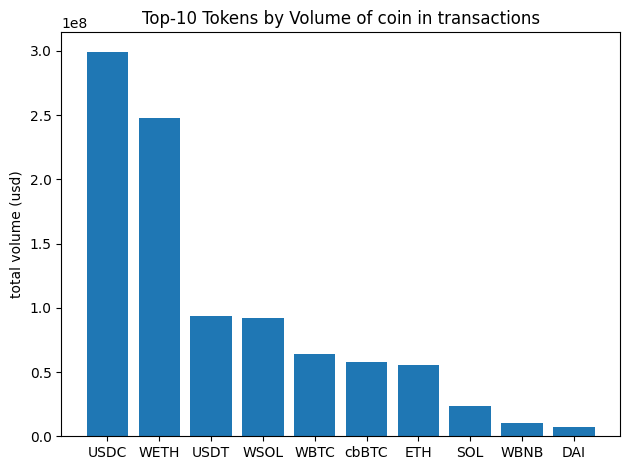

In [265]:
top_vol_usd = (
    df_defi.groupby("token")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume_usd")
)
display(top_vol_usd)

plt.bar(top_vol_usd['token'],top_vol_usd['raw_volume_usd'])
plt.ylabel("total volume (usd)")
plt.title("Top-10 Tokens by Volume of coin in transactions")
plt.tight_layout()

# Chain Top-10

,chain,chain_count
0,solana,250403
1,arbitrum_one,65448
2,base,20887
3,ethereum,18837
4,bsc,7346
5,optimism,3328
6,avalanche,1


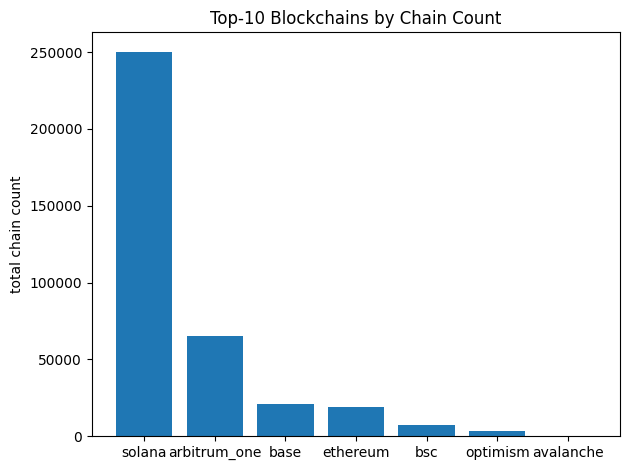

In [266]:
top_chain = (
    df_defi["chain"]
    .value_counts()
    .head(10)
    .rename_axis("chain")
    .reset_index(name="chain_count")
)
display(top_chain)

plt.bar(top_chain['chain'],top_chain['chain_count'])
plt.ylabel("total chain count")
plt.title("Top-10 Blockchains by Chain Count")
plt.tight_layout()

# Protocal Top-10

,entity,entity_count
0,Uniswap,153
1,Raydium,75
2,Meteora (Prev. Mercurial),74
3,Orca,68
4,PancakeSwap,33
5,Aerodrome Finance,19
6,Phoenix,11
7,SushiSwap,9
8,Jito,8
9,Lifinity,6


([<matplotlib.patches.Wedge at 0x152049f90>,
 [Text(0.5434239046809062, 0.9563945105558467, 'Uniswap'),
  Text(-0.9563945105558467, 0.5434239046809063, 'Raydium'),
  Text(-0.960115665402366, -0.5368220459788998, 'Meteora (Prev. Mercurial)'),
  Text(-0.09083724220568634, -1.0962429454406837, 'Orca'),
  Text(0.6330017251714376, -0.8996159268987983, 'PancakeSwap'),
  Text(0.9082523621967902, -0.6205462485294314, 'Aerodrome Finance'),
  Text(1.0162674980787743, -0.42095174586727735, 'Phoenix'),
  Text(1.064454619372721, -0.27737404942798094, 'SushiSwap'),
  Text(1.0895742964826354, -0.15108888921548916, 'Jito'),
  Text(1.0990603352760397, -0.04545744628682283, 'Lifinity')])

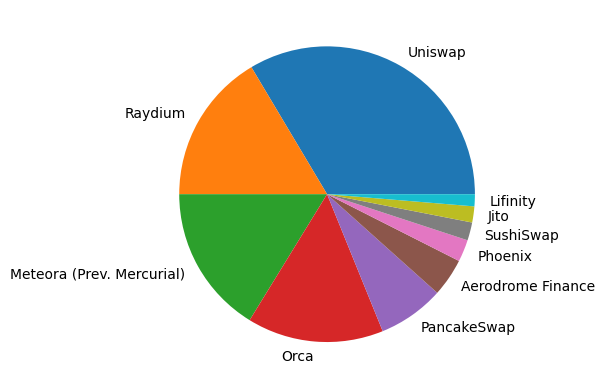

In [ ]:
df_defi_from = df_defi[df_defi['from_entity']!='Wintermute'][['from_address','from_entity']]
df_defi_from = df_defi_from.rename(columns={"from_address": "address", "from_entity": "entity"})

df_defi_to = df_defi[df_defi['to_entity']!='Wintermute'][['to_address','to_entity']]
df_defi_to = df_defi_to.rename(columns={"to_address": "address", "to_entity": "entity"})

df_defi_non_wintermute = (
    pd.concat([df_defi_from, df_defi_to], ignore_index=True)
      .drop_duplicates(subset=["address"])      # keep the first entity you see
      .reset_index(drop=True)
      .sort_values('entity')
)
df_defi_non_wintermute.value_counts(subset=['entity'])
top_protocol = (
    df_defi_non_wintermute["entity"]
    .value_counts()
    .head(10)
    .rename_axis("entity")
    .reset_index(name="entity_count")
)
display(top_protocol)
entity_list = top_protocol['entity'].values.tolist()
plt.pie(top_protocol['entity_count'],labels=entity_list)

# Temporal Trends

In [268]:
display(df_defi['timestamp'].min())
display(df_defi['timestamp'].max())

'2025-04-08 01:30:11+00:00'

'2025-04-08 12:49:57+00:00'

In [269]:
df_defi['timestamp'] = pd.to_datetime(df_defi["timestamp"],  utc=True, errors="coerce")
df_defi = df_defi.set_index("timestamp").sort_index()

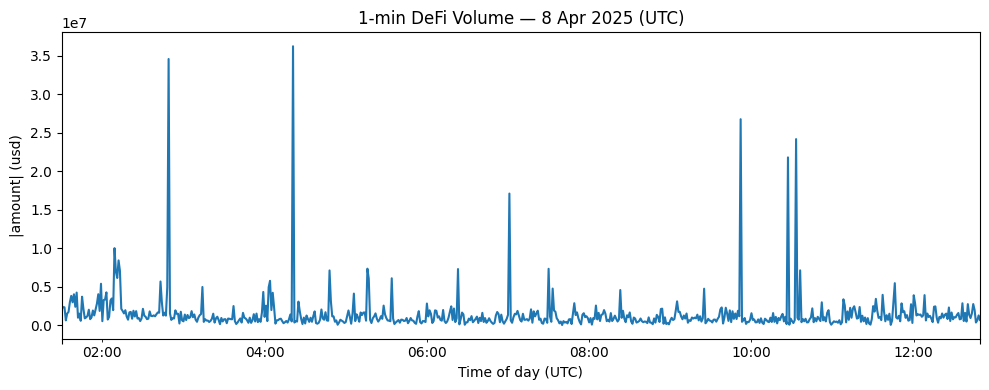

In [ ]:
vol_1m = df_defi["usd"].abs().resample("1min").sum()
vol_1m.plot(figsize=(10,4), title="1-min DeFi Volume — 8 Apr 2025 (UTC)")
plt.ylabel("amount (usd)")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/vol_1m.png", dpi=150)

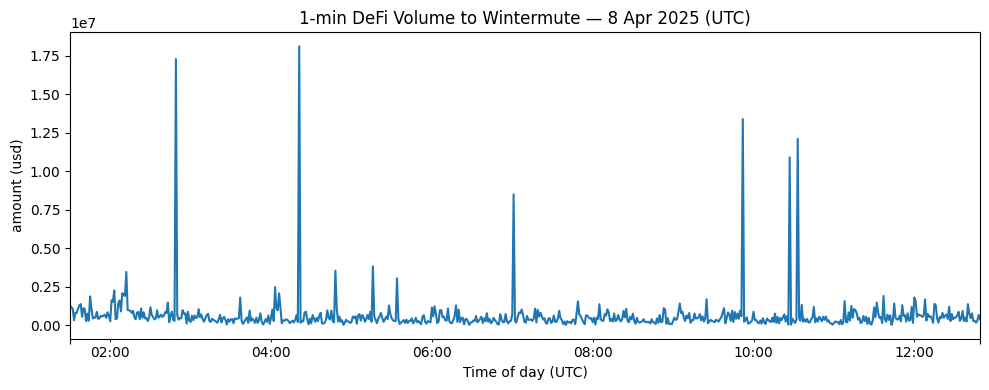

In [285]:
df_defi_from_full = df_defi[df_defi['from_entity']!='Wintermute']
vol_from_1m = df_defi_from_full["usd"].abs().resample("1min").sum()
vol_from_1m.plot(figsize=(10,4), title="1-min DeFi Volume to Wintermute — 8 Apr 2025 (UTC)")
plt.ylabel("amount (usd)")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/vol_from_1m.png", dpi=150)

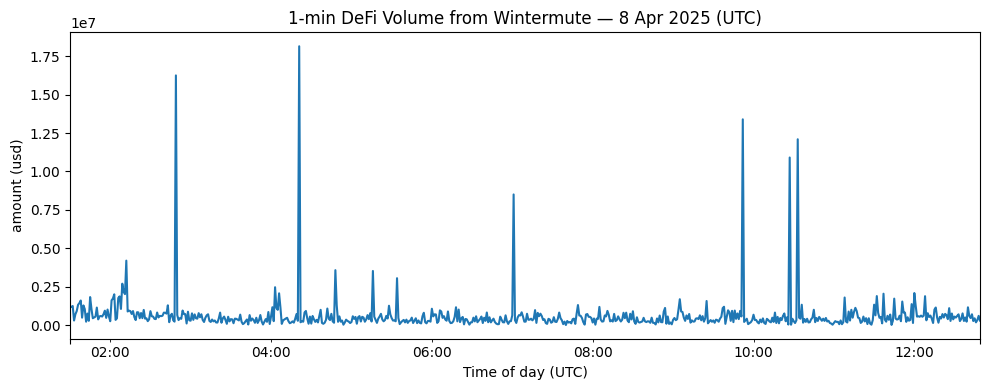

In [284]:
df_defi_to_full = df_defi[df_defi['to_entity']!='Wintermute']
vol_to_1m = df_defi_to_full["usd"].abs().resample("1min").sum()
vol_to_1m.plot(figsize=(10,4), title="1-min DeFi Volume from Wintermute — 8 Apr 2025 (UTC)")
plt.ylabel("amount (usd)")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/vol_to_1m.png", dpi=150)

- Baseline being non-zero positive values around 1e6 usd showing activity of market making strateigies.
- Huge spikes for each 45min to 1h. Half from Wintermute and the other half to Wintermute. This could mean either huge opportunities occured for market making strategies or a portfolio rebalancing conducted in regular times.

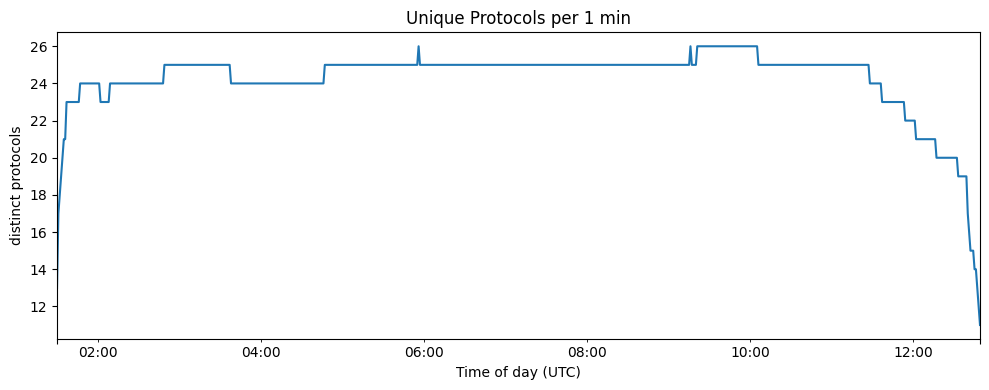

In [271]:
proto_1m = (
    df_defi.groupby("from_entity")["usd"]              
      .resample("1min")                          
      .size()                                   
      .reset_index(name="txs")
      .set_index("timestamp")                   
      .resample("1min")["from_entity"]                
      .nunique()                                
)
proto_1m.plot(figsize=(10,4), title="Unique Protocols per 1 min")
plt.ylabel("distinct protocols")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/unique_proto_1m.png", dpi=150)

- Increase in distinct protocols from 01:00
- Decrease in distinct protocols from 12:00
- However, there is no difference in baseline of the volume of trading in usd in increasing or decreasing distinct protocols